## Preprocessing of Data
We start by importing libraries

In [24]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.dataframe_overview import DfOverview
from scripts.dataframe_cleaner import DfCleaner
from scripts.dataframe_outliers import DfOutlier

In [2]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df_store = pd.read_csv('../data/store.csv')
df_test = pd.read_csv('../data/test.csv')
df_train = pd.read_csv('../data/train.csv')

We already have a brief description of fields in our dataset:
* __Id__ - an Id that represents a (Store, Date) duple within the test set
* __Store__ - a unique Id for each store
* __Sales__ - the turnover for any given day (this is what you are predicting)
* __Customers__ - the number of customers on a given day
* __Open__ - an indicator for whether the store was open: 0 = closed, 1 = open
* __StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* __SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools
* __StoreType__ - differentiates between 4 different store models: a, b, c, d
* __Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
* __CompetitionDistance__ - distance in meters to the nearest competitor store
* __CompetitionOpenSince__[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* __Promo__ - indicates whether a store is running a promo on that day
* __Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* __Promo2Since__[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* __PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Data Cleaning

Now let's take a closer look in the inforamtion of these datasets, e.g. size, shape, missing values, ..etc

In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


As we can see this dataset, has total __1115__ records

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


This is really big dataset, __1,017,209__ million+ make sense for a train data!

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


For the test dataset we have total of __41,088__ records

In [7]:
cleaner = DfCleaner()

In [8]:
store_overview = DfOverview(df_store)
store_overview.getOverview()

,count,null_count,null_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1115,0,0.0%,1115,100.0%,int64
StoreType,1115,0,0.0%,4,0.36%,object
Assortment,1115,0,0.0%,3,0.27%,object
Promo2,1115,0,0.0%,2,0.18%,int64
CompetitionDistance,1112,3,0.27%,654,58.65%,float64
CompetitionOpenSinceMonth,761,354,31.75%,12,1.08%,float64
CompetitionOpenSinceYear,761,354,31.75%,23,2.06%,float64
Promo2SinceWeek,571,544,48.79%,24,2.15%,float64
Promo2SinceYear,571,544,48.79%,7,0.63%,float64


Start by cleaning data and fill missing values, for the competitionDistance we filled missing values by median. I assume the distance is by meter, right?!

In [9]:
df_store["CompetitionDistance"].median()
cleaned_df_store = cleaner.fill_with_median(df_store, ['CompetitionDistance'])

Next we have CompetitionOpenSinceMonth and CompetitionOpenSinceYear, for these I just pick up the first month of the year exist and the eldest year. 

In [10]:
print(cleaned_df_store['CompetitionOpenSinceMonth'].min())
print(cleaned_df_store['CompetitionOpenSinceYear'].min())

1.0
1900.0


In [11]:
cleaned_df_store['CompetitionOpenSinceMonth'] = cleaned_df_store['CompetitionOpenSinceMonth'].fillna(1)
cleaned_df_store['CompetitionOpenSinceYear'] = cleaned_df_store['CompetitionOpenSinceYear'].fillna(1990)

Finally in store dataframe we have Promo2SinceWeek, Promo2SinceYear and Promo2Interval.. let's look at the unique values as they are not too many

In [12]:
print(np.sort(cleaned_df_store['Promo2SinceWeek'].unique()))
print(np.sort(cleaned_df_store['Promo2SinceYear'].unique()))
print(cleaned_df_store['PromoInterval'].unique())

[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [13]:
cleaned_df_store['Promo2SinceWeek'] = cleaned_df_store['Promo2SinceWeek'].fillna(0)
cleaned_df_store['Promo2SinceYear'] = cleaned_df_store['Promo2SinceYear'].fillna(0)
cleaned_df_store["PromoInterval"].isna().sum()

544

We left with PromoInterval, as we can see in the output of cell [12] there are mainly four unique interval, so we will split the intervals into four and replace that column of PromoInterval by four new columns:

In [14]:
all_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
def getMonth(months, index):
  if(months == 0):
    return 0
  month = months.split(',')[index]
  return all_month.index(month)+1

In [15]:
cleaned_df_store['PromoInterval'] = cleaned_df_store['PromoInterval'].fillna(0)
cleaned_df_store['PromoInterval0'] = cleaned_df_store.PromoInterval.apply((lambda x: getMonth(x, 0)))
cleaned_df_store['PromoInterval1'] = cleaned_df_store.PromoInterval.apply((lambda x: getMonth(x, 1)))
cleaned_df_store['PromoInterval2'] = cleaned_df_store.PromoInterval.apply((lambda x: getMonth(x, 2)))
cleaned_df_store['PromoInterval3'] = cleaned_df_store.PromoInterval.apply((lambda x: getMonth(x, 3)))
cleaned_df_store = cleaner.drop_columns(cleaned_df_store, ['PromoInterval'])

In [16]:
cleaned_df_store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval0               0
PromoInterval1               0
PromoInterval2               0
PromoInterval3               0
dtype: int64

Now we can move on to the next which is train data:

In [17]:
train_overview = DfOverview(df_train)
train_overview.getOverview()

,count,null_count,null_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1017209,0,0.0%,1115,0.11%,int64
DayOfWeek,1017209,0,0.0%,7,0.0%,int64
Date,1017209,0,0.0%,942,0.09%,object
Sales,1017209,0,0.0%,21734,2.14%,int64
Customers,1017209,0,0.0%,4086,0.4%,int64
Open,1017209,0,0.0%,2,0.0%,int64
Promo,1017209,0,0.0%,2,0.0%,int64
StateHoliday,1017209,0,0.0%,5,0.0%,object
SchoolHoliday,1017209,0,0.0%,2,0.0%,int64


Beautiful, there isn't any missing values, I'll just rename it be clean data

In [18]:
cleaned_df_train = df_train

Final step in the cleaning is the test data:

In [19]:
test_overview = DfOverview(df_test)
test_overview.getOverview()

,count,null_count,null_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Id,41088,0,0.0%,41088,100.0%,int64
Store,41088,0,0.0%,856,2.08%,int64
DayOfWeek,41088,0,0.0%,7,0.02%,int64
Date,41088,0,0.0%,48,0.12%,object
Promo,41088,0,0.0%,2,0.0%,int64
StateHoliday,41088,0,0.0%,2,0.0%,object
SchoolHoliday,41088,0,0.0%,2,0.0%,int64
Open,41077,11,0.03%,2,0.0%,float64


Almost cleaned except some missing values in the "Open" column, we will just fill them with ffil

In [20]:
cleaned_df_test = cleaner.fix_missing_ffill(df_test, ['Open'])
cleaned_df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [35]:
df_outliers = DfOutlier(cleaned_df_store)
df_outliers.replace_outliers_with_iqr(['CompetitionDistance'])
cleaned_df_store = df_outliers.df

TypeError: boxplot() got an unexpected keyword argument 'figsize'

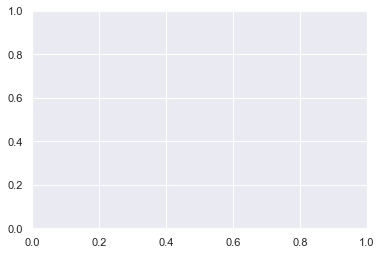

In [36]:
sns.boxplot(cleaned_df_store['CompetitionDistance'], figsize=(6, 4))